# **python 3: essentials** - part 3/11

## **Numpy**

Numpy provides some handy functions to read and write files. Basic reading and saving of text files with numerical columns can be achieved by using the numpy `loadtxt` and `savetxt` functions (the *txt* suffix does not mean that the functions work only on *.txt. files, but it means that `loadtxt` and `savetxt` can handle any ASCII-based file).

In [5]:
import numpy as np

Let's create three numpy arrays of the same length:

In [6]:
x = np.linspace(0.,1.,10)
y = np.logspace(0.,1.,10)
z = 10**np.linspace(0.,1.,10)
print(x)
print(y)
print(z)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[ 1.          1.29154967  1.66810054  2.15443469  2.7825594   3.59381366
  4.64158883  5.9948425   7.74263683 10.        ]
[ 1.          1.29154967  1.66810054  2.15443469  2.7825594   3.59381366
  4.64158883  5.9948425   7.74263683 10.        ]


We can then save them using the `np.savetxt` function. The syntax is simply:
```python 
np.savetxt('/path_to_filename/filename.txt',array_to_be_saved)
```
Let's save the three arrays in a single file, like this:

In [8]:
np.savetxt('xyz.txt',(x,y,z)) # with no path specification the file is saved in the currect directory

If you open the file you can see that each array has been save on each line of the file (i.e. the file is formed by **3 lines** and **10 columns**). We can then reload the three arrays:

In [9]:
X,Y,Z = np.loadtxt('xyz.txt') # load the file in three 1D array
print(X)
print(Y)
print(Z)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[ 1.          1.29154967  1.66810054  2.15443469  2.7825594   3.59381366
  4.64158883  5.9948425   7.74263683 10.        ]
[ 1.          1.29154967  1.66810054  2.15443469  2.7825594   3.59381366
  4.64158883  5.9948425   7.74263683 10.        ]


In the example above, we loaded the three arrays *X,Y,Z* from the file *xyz.txt*, which was created with `np.savetxt` and contains the tuple *(x,y,z)*. Loading it this way ensures that *X*,*Y* and *Z* will be have the same content as *x*,*y* and *z* respectively!
We can also load the same data in a single 2-dimensional array, simply like this:

In [10]:
data = np.loadtxt('xyz.txt') # load the file in one single 2D array
print(data[0])
print(data[1])
print(data[2])

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[ 1.          1.29154967  1.66810054  2.15443469  2.7825594   3.59381366
  4.64158883  5.9948425   7.74263683 10.        ]
[ 1.          1.29154967  1.66810054  2.15443469  2.7825594   3.59381366
  4.64158883  5.9948425   7.74263683 10.        ]


If you want to store the three arrays using columns instead of rows, you can proceed as follows:

In [11]:
np.savetxt('xyz_col.txt',np.column_stack([x,y,z])) # save the three arrays as columns

This time, if you open the file *xyz_col.txt*, you can see that the three arrays are now stored in three columns (i.e. the file is formed now by **10 lines** and **3 columns**). You can reload the arrays using:

In [12]:
X,Y,Z = np.loadtxt('xyz_col.txt',unpack=True) # load the file in three 1D array
print(X)
print(Y)
print(Z)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[ 1.          1.29154967  1.66810054  2.15443469  2.7825594   3.59381366
  4.64158883  5.9948425   7.74263683 10.        ]
[ 1.          1.29154967  1.66810054  2.15443469  2.7825594   3.59381366
  4.64158883  5.9948425   7.74263683 10.        ]


If you need only one of the arrays, you can read only one column through the `usecols` argument:

In [13]:
Y = np.loadtxt('xyz_col.txt',unpack=True,usecols=(1)) # load only column 1, remind the comma
print(Y)

[ 1.          1.29154967  1.66810054  2.15443469  2.7825594   3.59381366
  4.64158883  5.9948425   7.74263683 10.        ]


Full details about `loadtxt` and `savetxt` functions can be found in https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html and https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.savetxt.html

A little more control when reading a text file is possible through the `np.genfromtxt` function ( https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html ). 

Let's consider the file *file_no_missing.dat* that has 4 rows and columns, but the first column is filled with characters, i.e. we have to deal with mixed data types.

In [15]:
data = np.genfromtxt("file_no_missing.dat")
print(data)

OSError: file_no_missing.dat not found.

In [13]:
data = np.genfromtxt("file_no_missing.dat",unpack=True)
print(data)
print(data[0,0])

[[nan nan nan nan]
 [ 5.  1. 66.  3.]
 [ 8. 88.  9.  6.]
 [ 9.  5. 55. 15.]]
nan


As you can see you can read either by rows or columns and you will have a 2D object. However as shown characters are not understood. We can solve this issue by explicitly specifying the data type (the default is `float`, this explains the *not-a-number*).

In [7]:
data = np.genfromtxt("file_no_missing.dat",dtype=('U3',int,int,int))
print(data)

[('avv',  5,  8,  9) ('b',  1, 88,  5) ('c', 66,  9, 55) ('d',  3,  6, 15)]


This time it doesn't matter if you specify the `unpack` keyword, the output will always be a 1D array with a structured dtype, in our case `dtype=('U3',int,int,int)`, i.e. a unicode string (the number refers to the number of character to be read) and three integers. Each component of `data[i]` will represent each line of the file. You can access elements by double square brackets `[ ][ ]`, but not with single square brackets `[ , ]`.

It might happen that you have to read files with missing entries. `np.genfromtxt` can handle this situation, but this time you need to explicitly specify the delimiter of the columns, e.g. using a comma to separate columns as in the file "file_missing_comma.dat":

In [136]:
data2 = np.genfromtxt("file_missing_comma.dat",delimiter=',',dtype=('U3',int,int,int),filling_values=-1)
print(data2)

[('avv',  5, -1,  9) ('b',  1, 88,  5) ('c', -1,  9, 55) ('d',  3,  6, -1)]


or explicitly set the width of each column:

## **Errors**

### Errors

Almost on a daily basis the Python interpreter will throw error messages while executing your code. 
This is pretty normal, but it is very important to understand the origin and nature of error.

We can have different kind of errors (see here https://docs.python.org/3/library/exceptions.html for further details):
- Syntax Errors: Python reports a syntax error when it cannot understand the source of a program (e.g. when you read a text and words are misspelled or non-existing)

In [1]:
print("hello world"


SyntaxError: unexpected EOF while parsing (Temp/ipykernel_11660/3834898136.py, line 1)

- Runtime Errors: Python reports a runtime error when something goes wrong while a program is executing. Here we can have different type of errors specifically connected to the nature of the bad instruction

In [2]:
age = 53
remaining = 100 - aege # mis-spelled 'age'

NameError: name 'aege' is not defined

In [3]:
1/0 # math errors like division by zero

ZeroDivisionError: division by zero

In [5]:
1+"c" # non-defined operations

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [7]:
import ciao

ModuleNotFoundError: No module named 'ciao'

As you can see, the Python interpreter try to tell you the possible reason for the error, here more errors:

| Exception             | Description |
| ----------------------| ------------|
| AssertionError        | Raised when the assert statement fails. |
| AttributeError 	    | Raised on the attribute assignment or reference fails. |
| EOFError 	            | Raised when the input() function hits the end-of-file condition. |
| FloatingPointError    | Raised when a floating point operation fails. |
| GeneratorExit         | Raised when a generator's close() method is called. |
| ImportError           | Raised when the imported module is not found. |
| IndexError            | Raised when the index of a sequence is out of range. |
| KeyError              | Raised when a key is not found in a dictionary. |
| KeyboardInterrupt     | Raised when the user hits the interrupt key (Ctrl+c or delete). |
| MemoryError           | Raised when an operation runs out of memory. |
| NameError             | Raised when a variable is not found in the local or global scope. |
| NotImplementedError   | Raised by abstract methods. |
| OSError               | Raised when a system operation causes a system-related error. |
| OverflowError         | Raised when the result of an arithmetic operation is too large to be represented. |
| ReferenceError        | Raised when a weak reference proxy is used to access a garbage collected referent. |
| RuntimeError          | Raised when an error does not fall under any other category. |
| StopIteration         | Raised by the next() function to indicate that there is no further item to be returned by the iterator. |
| SyntaxError           | Raised by the parser when a syntax error is encountered. |
| IndentationError      | Raised when there is an incorrect indentation. |
| TabError              | Raised when the indentation consists of inconsistent tabs and spaces. |
| SystemError           | Raised when the interpreter detects internal error. |
| SystemExit            | Raised by the sys.exit() function. |
| TypeError             | Raised when a function or operation is applied to an object of an incorrect type. |
| UnboundLocalError     | Raised when a reference is made to a local variable in a function or method, but no value has been bound to that variable. |
| UnicodeError          | Raised when a Unicode-related encoding or decoding error occurs. |
| UnicodeEncodeError    | Raised when a Unicode-related error occurs during encoding. |
| UnicodeDecodeError    | Raised when a Unicode-related error occurs during decoding. |
| UnicodeTranslateError | Raised when a Unicode-related error occurs during translation. |
| ValueError 	        | Raised when a function gets an argument of correct type but improper value. |
| ZeroDivisionError 	| Raised when the second operand of a division or module operation is zero. |

### Warnings

Differently from errors, warnings do not stop the execution of your code, but they just advise you that something worth to note is happening. For instance you can be informed that a routine is taking too long or that some unexpected values occurred. Here a list (see here for further details https://docs.python.org/3/library/warnings.html):

| Class              | Description |
|--------------------|-------------|
| Warning            | This is the base class of all warning category classes. It is a subclass of Exception. |
| UserWarning        | The default category for warn(). |
| DeprecationWarning | Base category for warnings about deprecated features when those warnings are intended for other Python developers (ignored by default, unless triggered by code in \__main__). |
| SyntaxWarning      | Base category for warnings about dubious syntactic features. |
| RuntimeWarning     | Base category for warnings about dubious runtime features. |
| FutureWarning      | Base category for warnings about deprecated features when those warnings are intended for end users of applications that are written in Python. |
| PendingDeprecationWarning | Base category for warnings about features that will be deprecated in the future (ignored by default). |
| ImportWarning      | Base category for warnings triggered during the process of importing a module (ignored by default). |
| UnicodeWarning     | Base category for warnings related to Unicode. |
| BytesWarning       | Base category for warnings related to bytes and bytearray. |
| ResourceWarning    | Base category for warnings related to resource usage (ignored by default). |

# Getting help

Given the high modularity of Python, in which you have to deal with several module with hundreds of functions, a documentation is fundamental.
Each package has its own specific documentation on a website that you can simply find through Google (e.g. try to look for numpy).

Python also has a built-in function to get information about the documentation, this is the `help` function. For instance we could look for information about another built-in function, the `print` function

In [16]:
help(print)

Help on built-in function print in module builtins:

print(...)
    print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
    
    Prints the values to a stream, or to sys.stdout by default.
    Optional keyword arguments:
    file:  a file-like object (stream); defaults to the current sys.stdout.
    sep:   string inserted between values, default a space.
    end:   string appended after the last value, default a newline.
    flush: whether to forcibly flush the stream.



Within Jupyter you can access the documentation in two ways:
- Option 1: 
    - Place the cursor near where the function is invoked in a cell (i.e., the function name or its parameters),
    - Hold down Shift, and press Tab.
    - Do this several times to expand the information returned.
- Option 2: Type the function name in a cell with a question mark after it. Then run the cell.


In [18]:
print?

Docstring:
print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)

Prints the values to a stream, or to sys.stdout by default.
Optional keyword arguments:
file:  a file-like object (stream); defaults to the current sys.stdout.
sep:   string inserted between values, default a space.
end:   string appended after the last value, default a newline.
flush: whether to forcibly flush the stream.
Type:      builtin_function_or_method


As you can see you get the function docstring (a brief description) containing an explanation of the arguments you need to provide. 
**It is good practice that you also write a docstring for your own defined functions, this will help you to trace what your code does and make it easier to share your work.** You can also use shift+TAB.

If you are using *jupyter lab*, you have access to an additional tool that helps with the documentation. In the *jupyter lab* launcher you find (generally on the last raw) a button **Show contextual**. This opens a half window tab where, by putting the cursor on a Python function, a full description is extracted, very similar to the `?` help, but enlarged.

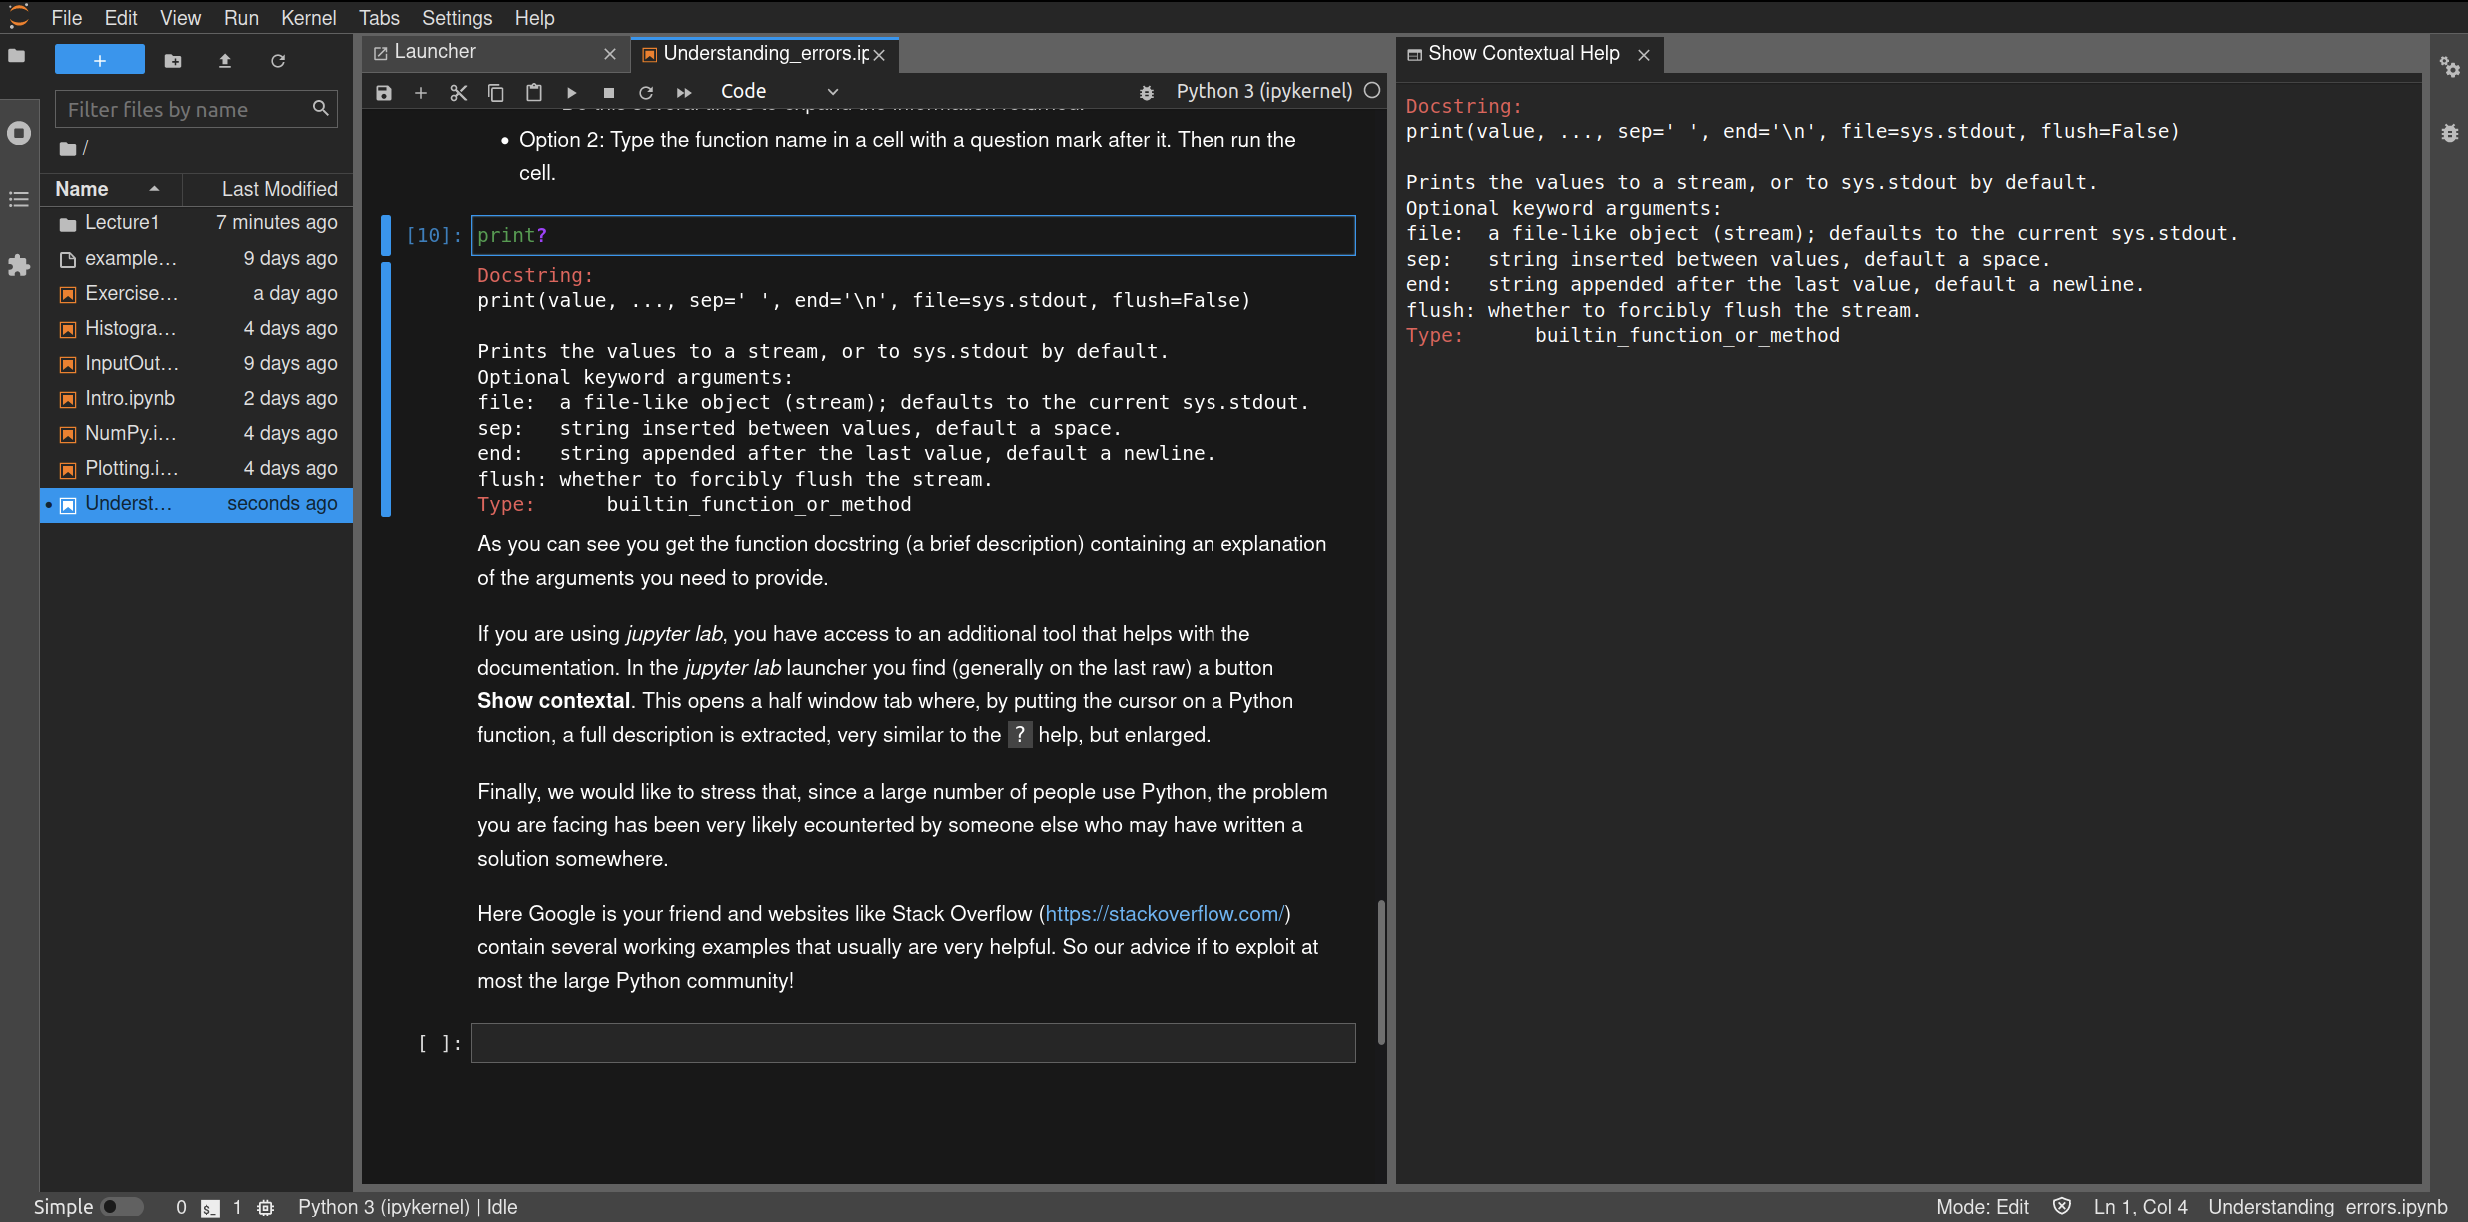




Finally, we would like to stress that, since a large number of people use Python, the problem you are facing has been very likely encountered by someone else who may have written a solution somewhere.

Here **Google is your friend** and websites like **Stack Overflow** (https://stackoverflow.com/) contain several working examples that usually are very helpful. So our advice if to exploit at most the large Python community!